The CTD data load and read for PAR data in this notebook

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Pandalus

In [16]:

data_pandalus = pd.read_csv('G:/AFKABAN/Pandalus_260123/azkaban_CTD.light_26JAN23.csv')

## Calculate time array
Datetime is calculated by using the mpe.time clock, which indicates the time since the first measurements in thousands of a second. The working the way to lining up with the time of the second Lights ON time at 1130, which was done at exactly 11:30.
It is not ideal but it lines up the clocks

In [17]:
datetime_p_arr = np.empty(len(data_pandalus), dtype=datetime)

In [18]:
for t in range(len(data_pandalus)):
    datetime_p_arr[t] = datetime(2023,1,26,13,5,0)+timedelta(0,int(data_pandalus['ctd.time'][t]/1000))

In [19]:
data_pandalus['datetime'] = datetime_p_arr

In [44]:
# select when cage was underwater
inw = np.where(data_pandalus['depth1.m']>3)[0][0]
out = np.where(data_pandalus['depth1.m']>3)[0][-1]

### Determine T S and D during deployment

In [50]:
mean_t =  np.mean(data_pandalus['temp.C'][inw:out])
mean_s = np.mean(data_pandalus['sal.psu'][inw:out])
mean_d = np.mean(data_pandalus['depth1.m'][inw:out])
print('During the AFKABAN experiment on January 26th, 2023 with Pandalus borealis, the mean temperature was %.2f degC, salinity was %.2f PSU at depth %.2f m.' %(mean_t, mean_s, mean_d))

During the AFKABAN experiment on January 26th, 2023 with Pandalus borealis, the mean temperature was 1.23 degC, salinity was 34.60 PSU at depth 4.30 m.


## Plot results

Text(0.5, 1.0, 'Light cycles during Pandalus experiments')

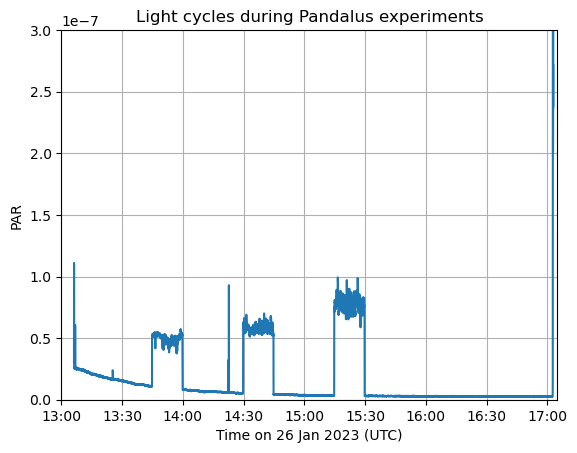

In [45]:
ax = plt.subplot()
plt.plot(data_pandalus['datetime'][inw:out],data_pandalus['mpe.par.UWcal'][inw:out])
plt.grid()
plt.xlim(datetime(2023,1,26,13,0), datetime(2023,1,26,17,5))
plt.ylim([0,0.0000003])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.ylabel('PAR')
plt.xlabel('Time on 26 Jan 2023 (UTC)')
plt.title("Light cycles during Pandalus experiments")

Note the spike when Tiesten came at 14:20

# Krill

In [7]:
data = pd.read_csv('G:/AFKABAN/Krill_270123/azkaban_CTD.light_27JAN23.csv')

In [8]:
datetime_arr = np.empty(len(data), dtype=datetime)

In [9]:
for t in range(len(data)):
    datetime_arr[t] = datetime(2023,1,27,9,18,35)+timedelta(0,int(data['ctd.time'][t]/1000))

In [10]:
data['datetime'] = datetime_arr

## Plot results

Text(0.5, 1.0, 'Light cycles during Krill experiments')

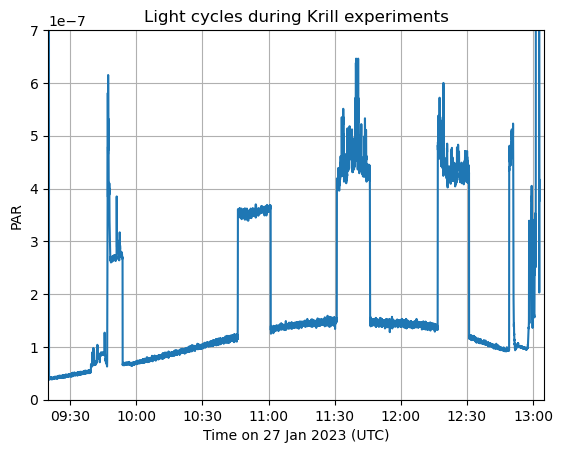

In [11]:
ax = plt.subplot()
plt.plot(data['datetime'],data['mpe.par.UWcal'])
plt.grid()
plt.xlim(datetime(2023,1,27,9,20), datetime(2023,1,27,13,5))
plt.ylim([0,0.0000007])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
plt.ylabel('PAR')
plt.xlabel('Time on 27 Jan 2023 (UTC)')
plt.title("Light cycles during Krill experiments")